In [1]:
import numpy as np

class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iter=1000):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.weights = None
        self.loss_history = []
        
    def _sigmoid(self, z):
        """Сигмоидная функция"""
        return 1 / (1 + np.exp(-z))
    
    def _add_bias_term(self, X):
        """Добавляем фиктивный признак для bias (столбец из единиц)"""
        return np.column_stack([X, np.ones(X.shape[0])])
    
    def log_loss(self, X, y):
        """Бинарная перекрестная энтропия"""
        epsilon = 1e-15  # чтобы избежать log(0)
        
        y_pred = self._sigmoid(X @ self.weights)
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

        loss = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        grad = (X.T @ (y_pred - y)) / len(y)

        return loss, grad
    
    def optimize(self, X, y):
        """Обучение модели"""
        X = self._add_bias_term(X)
        
        # Инициализируем веса
        n_features = X.shape[1]
        self.weights = np.zeros(n_features)
        
        # Градиентный спуск
        for i in range(self.n_iter):
            # Прямое распространение
            loss, grad = self.log_loss(X, y)
            self.weights = self.weights - grad * self.learning_rate
            self.loss_history.append(loss)
            
        return self
    
    def predict(self, X, threshold=0.5):
        """Предсказание классов"""
        X = self._add_bias_term(X)
        probabilities = self._sigmoid(X @ self.weights)
        return (probabilities >= threshold).astype(int)
    

Final weights: [ 3.73358795  3.74240946 -0.17462947]
Final loss: 0.1148


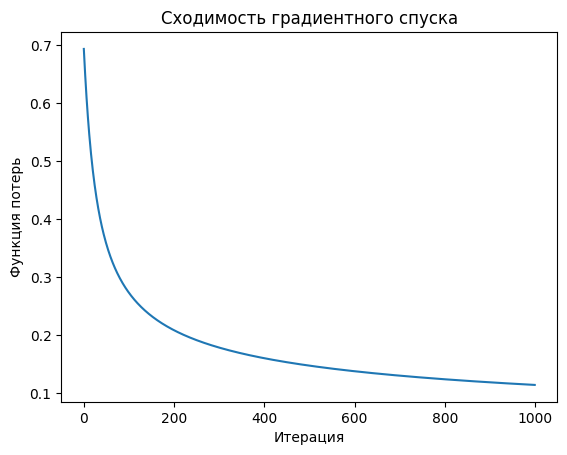

In [2]:
# Создаем тестовые данные
def test_logistic_regression():
    np.random.seed(42)
    
    # Простые линейно разделимые данные
    n_samples = 100
    X = np.random.randn(n_samples, 2)
    y = (X[:, 0] + X[:, 1] > 0).astype(int)  # Простое линейное правило
    
    # Создаем и обучаем модель
    model = LogisticRegression(learning_rate=0.1, n_iter=1000)
    model.optimize(X, y)

    print(f"Final weights: {model.weights}")
    print(f"Final loss: {model.loss_history[-1]:.4f}")
    
    # Визуализация сходимости
    import matplotlib.pyplot as plt
    plt.plot(model.loss_history)
    plt.title('Сходимость градиентного спуска')
    plt.xlabel('Итерация')
    plt.ylabel('Функция потерь')
    plt.show()
    
    return model, X, y

# Запускаем тест
model, X, y = test_logistic_regression()

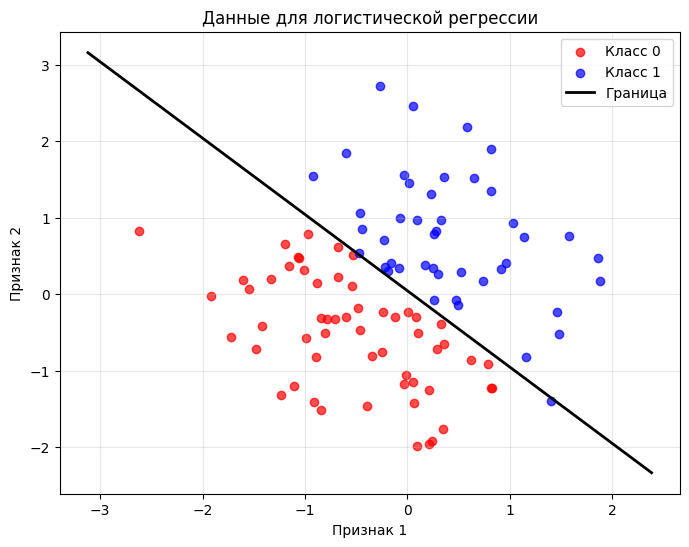

In [3]:
import matplotlib.pyplot as plt

def simple_plot(model, X, y):
    """Простая визуализация данных"""
    plt.figure(figsize=(8, 6))
    
    # Красные точки для класса 0, синие для класса 1
    plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Класс 0', alpha=0.7)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Класс 1', alpha=0.7)

    w1, w2, b = model.weights[0], model.weights[1], model.weights[2]
    x1 = np.array([X[:, 0].min()-0.5, X[:, 0].max()+0.5])
    x2 = (-w1 * x1 - b) / w2
    plt.plot(x1, x2, 'black', linewidth=2, label='Граница')
    
    plt.xlabel('Признак 1')
    plt.ylabel('Признак 2') 
    plt.title('Данные для логистической регрессии')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Использование
simple_plot(model, X, y)